#Popuation Visualisation of World

Question 1 -World Population Dataset

In [ ]:
import pandas as pd

df_world_population = pd.read_csv('/content/world_population[1].csv')
display(df_world_population.head())
display(df_world_population.info())

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

None


--- Selected Population Data (before reshaping) ---


,Country/Territory,2022 Population,2020 Population,2015 Population
41,China,1425887337,1424929781,1393715448
92,India,1417173173,1396387127,1322866505
221,United States,338289857,335942003,324607776
93,Indonesia,275501339,271857970,259091970
156,Pakistan,235824862,227196741,210969298



--- Melted and Cleaned Population Data (ready for plotting) ---


,Country/Territory,Year,Population
0,China,2022,1425887337
1,India,2022,1417173173
2,United States,2022,338289857
3,Indonesia,2022,275501339
4,Pakistan,2022,235824862


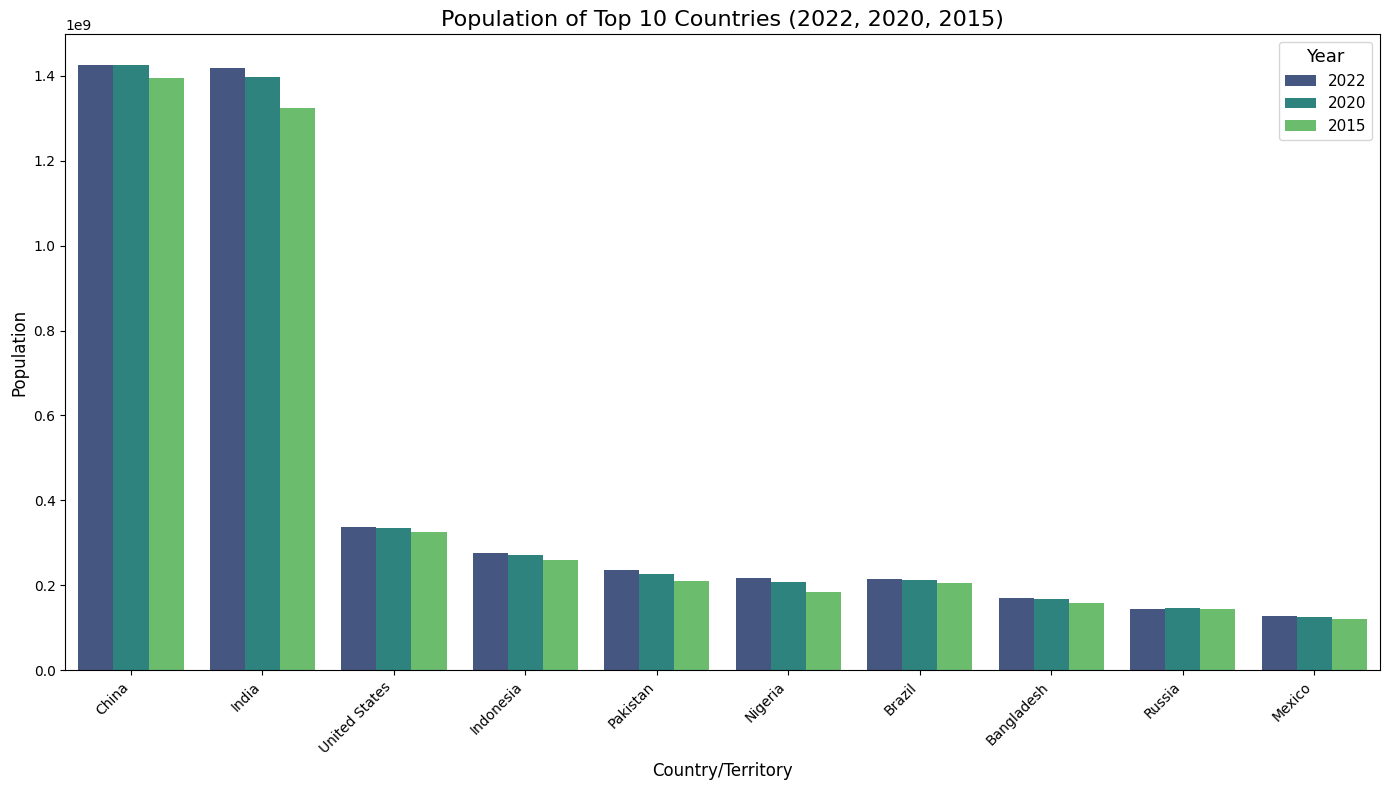

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the top 10 most populated countries in 2022
# We use .nlargest() to get the rows with the highest values in the '2022 Population' column.
top_countries = df_world_population.nlargest(10, '2022 Population')

# Step 2: Select only the relevant population data for these top countries
# We choose 'Country/Territory' for identifying countries and the population columns for the years we want to compare.
population_data = top_countries[['Country/Territory', '2022 Population', '2020 Population', '2015 Population']]

# Display the selected data before reshaping to see its current format
print("\n--- Selected Population Data (before reshaping) ---")
display(population_data.head())

# Step 3: Reshape the data from 'wide' to 'long' format using melt()
# This is crucial for Seaborn's barplot when plotting multiple categories (years) for each country.
# 'id_vars' specifies columns to keep as identifiers (Country/Territory).
# 'var_name' will be the new column name for the old column headers (like '2022 Population').
# 'value_name' will be the new column name for the values (the actual population numbers).
melted_population = population_data.melt(id_vars=['Country/Territory'],
                                       var_name='Year',
                                       value_name='Population')

# Step 4: Clean up the 'Year' column names
# The 'Year' column currently has values like '2022 Population'. We want just '2022'.
melted_population['Year'] = melted_population['Year'].str.replace(' Population', '')

# Display the reshaped and cleaned data to see its new format
print("\n--- Melted and Cleaned Population Data (ready for plotting) ---")
display(melted_population.head())

# Step 5: Create the bar plot
# plt.figure() sets the size of our plot for better readability.
plt.figure(figsize=(14, 8))

# sns.barplot() creates the bar chart.
# 'x' axis will represent the 'Country/Territory'.
# 'y' axis will represent the 'Population'.
# 'hue' will separate bars for each 'Year', creating grouped bars for comparison.
# 'data' specifies the DataFrame to use.
# 'palette' sets the color scheme for the bars.
sns.barplot(x='Country/Territory', y='Population', hue='Year', data=melted_population, palette='viridis')

# Step 6: Add labels and title for clarity
plt.title('Population of Top 10 Countries (2022, 2020, 2015)', fontsize=16)
plt.xlabel('Country/Territory', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Rotate x-axis labels to prevent overlapping, especially with long country names.
plt.xticks(rotation=45, ha='right')

# Add a legend to explain what each color (hue) represents (which year).
plt.legend(title='Year', title_fontsize='13', fontsize='11')

# Adjust layout to make sure all elements (labels, title) fit within the figure area.
plt.tight_layout()

# Display the plot.
plt.show()

# Continent Visualization according to Pie Chart

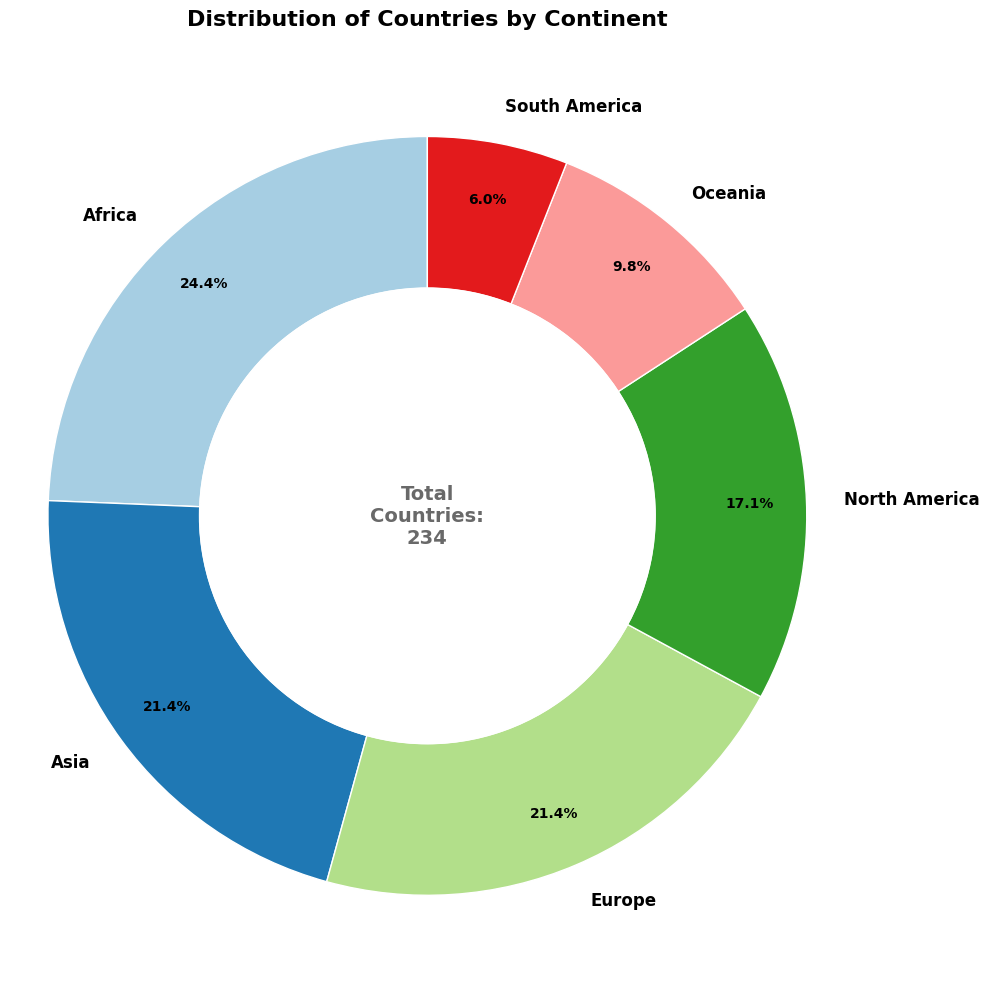

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataframe if not already in the current execution context
df_world_population = pd.read_csv('/content/world_population[1].csv')

# Count the number of countries in each continent
continent_counts = df_world_population['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Number of Countries']

# Sort for better presentation in the pie chart
continent_counts = continent_counts.sort_values(by='Number of Countries', ascending=False)

# Prepare data for plotting
labels = continent_counts['Continent']
sizes = continent_counts['Number of Countries']

# Choose a vibrant color palette
colors = sns.color_palette('Paired', len(labels))

# Create the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Create the pie chart (donut style)
wedges, texts, autotexts = ax.pie(sizes,
                                  colors=colors,
                                  autopct=lambda pct: f'{pct:.1f}%',
                                  pctdistance=0.85,
                                  startangle=90,
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

# Add the center circle to make it a donut chart
centre_circle = plt.Circle((0,0), 0.6, fc='white',linewidth=1.25,edgecolor='w')
fig.gca().add_artist(centre_circle)

# Add labels to the wedges and set font properties for percentages
for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
    text.set_text(labels.iloc[i]) # Set continent names as labels
    text.set_fontsize(12)
    text.set_fontweight('bold')
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Add a title
ax.set_title('Distribution of Countries by Continent', fontsize=16, fontweight='bold', pad=20)

# Add a central text (optional for extra flair)
plt.text(0, 0, 'Total\nCountries:\n' + str(len(df_world_population)),
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=14,
         fontweight='bold',
         color='dimgray')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.tight_layout()
plt.show()

# Population Growth over decades in Asia

The analysis of the 'World Population' dataset reveals a significant and consistent population growth in Asia from 1970 to 2022. The total population of Asia has more than doubled during this period, increasing from approximately 2.14 billion in 1970 to over 4.72 billion in 2022. This indicates a steady and substantial increase in population across the Asian continent over the decades.



# Thankyou